# Emotion Classification with the GoEmotions Dataset

Welcome to this Colab notebook, where we analyze, preprocess, and prepare the **GoEmotions** dataset for emotion classification tasks. The GoEmotions dataset is a multi-label dataset designed for fine-grained emotion classification, encompassing 27 emotion labels and a neutral category. This notebook streamlines the dataset into broader categories and preprocessed text for downstream machine learning or deep learning tasks.

### Key Highlights:
- **Dataset Exploration:** Load and understand the structure of the GoEmotions dataset.
- **Multi-label to Single-label Transformation:** Simplify the dataset by selecting the majority emotion for each instance.
- **Emotion Mapping:** Group 27 fine-grained emotions into 11 broad emotion categories for simpler analysis.
- **Text Preprocessing:** Clean the text data by removing stopwords, stemming, and preparing it for further analysis.
- **Visualization:** Explore emotion distributions and visualize their trends in the dataset.




# Step 1: Import necessary libraries

In [12]:
!pip install datasets

In [13]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Step 2: Load the GoEmotions dataset

In [15]:
dataset = load_dataset("go_emotions")

# Step 3: Convert the datasets to DataFrames

In [16]:
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# Step 4: Combine datasets into a single DataFrame

In [17]:
df_combined = pd.concat([df_train, df_val, df_test], ignore_index=True)
print(df_combined.head(5))

                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj


# Step 5: Check for missing and null values

In [18]:
missing_values = df_combined.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


# Step 6: Number of samples

In [19]:
num_samples = df_combined.shape[0]
print("Number of Samples:", num_samples)

Number of Samples: 54263


# Step 7: Rename the columns

In [20]:
df_combined = df_combined.rename(columns={'text': 'TEXT', 'labels': 'LABEL'})

# Step 8: Drop the 'id' column

In [21]:
df_combined = df_combined.drop(columns=['id'])
# Display the updated DataFrame
print(df_combined.head())

                                                TEXT LABEL
0  My favourite food is anything I didn't have to...  [27]
1  Now if he does off himself, everyone will thin...  [27]
2                     WHY THE FUCK IS BAYLESS ISOING   [2]
3                        To make her feel threatened  [14]
4                             Dirty Southern Wankers   [3]


# Step 9: Function to check missing values and visualize emotion distribution

In [22]:
# Emotion labels as per GoEmotions dataset
emotion_labels = {
    0: "neutral",
    1: "joy",
    2: "sadness",
    3: "anger",
    4: "fear",
    5: "disgust",
    6: "shame",
    7: "guilt",
    8: "surprise",
    9: "amusement",
    10: "confusion",
    11: "admiration",
    12: "excitement",
    13: "disappointment",
    14: "boredom",
    15: "frustration",
    16: "embarrassment",
    17: "relief",
    18: "curiosity",
    19: "nostalgia",
    20: "pride",
    21: "envy",
    22: "longing",
    23: "yearning",
    24: "hate",
    25: "desire",
    26: "pity",
    27: "hope"
}

Label Counts for Each Sample:
 Num_Labels
1    45446
2     8124
3      655
4       37
5        1
Name: count, dtype: int64
--- Combined Dataset ---
Emotion Class Distribution (Sorted by Label):
    LABEL    Emotion_Name  Count
0       0         neutral   5122
1       1             joy   2895
2       2         sadness   1960
3       3           anger   3093
4       4            fear   3687
5       5         disgust   1375
6       6           shame   1673
7       7           guilt   2723
8       8        surprise    801
9       9       amusement   1583
10     10       confusion   2581
11     11      admiration   1013
12     12      excitement    375
13     13  disappointment   1052
14     14         boredom    764
15     15     frustration   3372
16     16   embarrassment     96
17     17          relief   1785
18     18       curiosity   2576
19     19       nostalgia    208
20     20           pride   1976
21     21            envy    142
22     22         longing   1382
23     23     

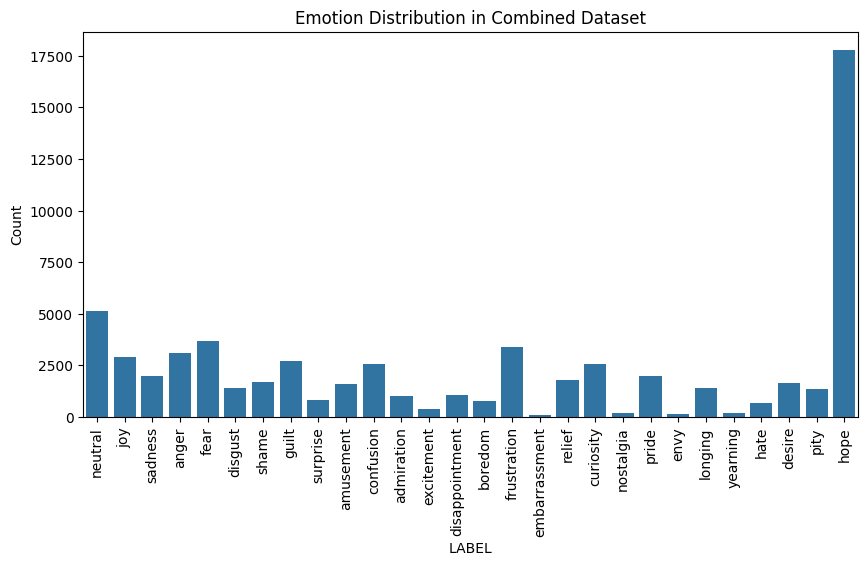

In [23]:
def analyze_combined_dataset(df):
    print("--- Combined Dataset ---")

    # Emotion class distribution
    flattened_labels = [label for sublist in df['LABEL'] for label in sublist]
    emotion_counts = Counter(flattened_labels)

    # Convert to DataFrame for easier plotting
    emotion_df = pd.DataFrame(emotion_counts.items(), columns=['LABEL', 'Count'])

    # Map labels to emotion names
    emotion_df['Emotion_Name'] = emotion_df['LABEL'].map(emotion_labels)

    # Sort by emotion label
    emotion_df = emotion_df.sort_values(by='LABEL').reset_index(drop=True)

    print("Emotion Class Distribution (Sorted by Label):")
    print(emotion_df[['LABEL', 'Emotion_Name', 'Count']])

    # Plot emotion distribution
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Emotion_Name', y='Count', data=emotion_df)
    plt.title("Emotion Distribution in Combined Dataset")
    plt.xlabel("LABEL")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()


#  Check the number of labels in the EMOTION column for each sample
df_combined['Num_Labels'] = df_combined['LABEL'].apply(len)
print("Label Counts for Each Sample:\n", df_combined['Num_Labels'].value_counts())

# Analyze the combined dataset
analyze_combined_dataset(df_combined)

**Analysis of the Label Counts**

- Single-Label Samples:
Count: 45,446 samples have a single emotion label (Num_Labels = 1).
Percentage: This constitutes about 83.7% of the entire dataset.
Interpretation: A significant majority of the dataset consists of samples that express a single emotion clearly. This suggests that for these instances, the emotional sentiment is straightforward and can be easily categorized.

- Two-Label Samples:
Count: 8,124 samples have two emotion labels (Num_Labels = 2).
Percentage: This accounts for approximately 15% of the dataset.
Interpretation: This indicates that there is a moderate presence of mixed emotions in some texts, which is common in nuanced expressions of sentiment.

- Three-Label Samples:
Count: 655 samples have three emotion labels (Num_Labels = 3).
Percentage: Roughly 1.2% of the dataset.
Interpretation: These instances suggest more complex emotional expressions where a single emotion does not capture the sentiment accurately.

- Four-Label Samples:
Count: 37 samples have four emotion labels (Num_Labels = 4).
Percentage: This is very minimal, representing about 0.07% of the dataset.
Interpretation: The presence of these samples indicates rare cases of highly complex emotions, likely requiring deeper contextual understanding.

- Five-Label Samples:
Count: 1 sample has five emotion labels (Num_Labels = 5).
Percentage: This is negligible (0.002%).
Interpretation: This instance is an outlier, indicating an extremely complex emotional response that may be challenging to categorize effectively.

# Step 10: Convert Multi-Label Column into Single Label (EMOTION COLUMN)

In [24]:
# Check that the number of labels in EMOTION Column
df_combined.head(50)

,TEXT,LABEL,Num_Labels
0,My favourite food is anything I didn't have to...,[27],1
1,"Now if he does off himself, everyone will thin...",[27],1
2,WHY THE FUCK IS BAYLESS ISOING,[2],1
3,To make her feel threatened,[14],1
4,Dirty Southern Wankers,[3],1
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],1
6,Yes I heard abt the f bombs! That has to be wh...,[15],1
7,We need more boards and to create a bit more s...,"[8, 20]",2
8,Damn youtube and outrage drama is super lucrat...,[0],1
9,It might be linked to the trust factor of your...,[27],1


In [25]:
# Function to convert multi-label into single label by selecting the majority label
def select_majority_label(labels):
    # Count occurrences of each label
    label_counts = Counter(labels)
    # Select the most common label
    most_common_label, _ = label_counts.most_common(1)[0]
    return most_common_label

# Transform the EMOTION column to single labels
df_combined['Single_Label'] = df_combined['LABEL'].apply(select_majority_label)

# Display the updated DataFrame
print(df_combined[['LABEL', 'Single_Label']].head(50))

         LABEL  Single_Label
0         [27]            27
1         [27]            27
2          [2]             2
3         [14]            14
4          [3]             3
5         [26]            26
6         [15]            15
7      [8, 20]             8
8          [0]             0
9         [27]            27
10         [6]             6
11      [1, 4]             1
12        [27]            27
13         [5]             5
14         [3]             3
15     [3, 12]             3
16        [15]            15
17         [2]             2
18        [27]            27
19     [6, 22]             6
20  [6, 9, 27]             6
21        [12]            12
22        [27]            27
23        [27]            27
24        [27]            27
25         [2]             2
26        [27]            27
27    [16, 25]            16
28        [15]            15
29        [27]            27
30         [2]             2
31         [6]             6
32        [27]            27
33      [2, 7]

# Step 11: Map The Label into their corresponding emotion

In [26]:
# Function to replace label with corresponding emotion name
def replace_label_with_name(label):
    return emotion_labels[label]

# Apply the function to create a new column with emotion names
df_combined['Single_Label_Name'] = df_combined['Single_Label'].apply(replace_label_with_name)

# Display the updated DataFrame
print(df_combined[['Single_Label', 'Single_Label_Name']].head())


   Single_Label Single_Label_Name
0            27              hope
1            27              hope
2             2           sadness
3            14           boredom
4             3             anger


   Single_Label Single_Label_Name
0            27              hope
1            27              hope
2             2           sadness
3            14           boredom
4             3             anger
Emotion Name Distribution:
 Single_Label_Name
hope              16021
neutral            5122
fear               3269
joy                2793
frustration        2681
anger              2671
guilt              2210
confusion          2117
sadness            1936
curiosity          1883
shame              1543
amusement          1284
relief             1250
pride              1227
disgust            1218
desire             1067
pity                938
longing             893
disappointment      862
admiration          738
surprise            681
boredom             658
hate                497
excitement          306
nostalgia           132
yearning            111
embarrassment        81
envy                 74
Name: count, dtype: int64


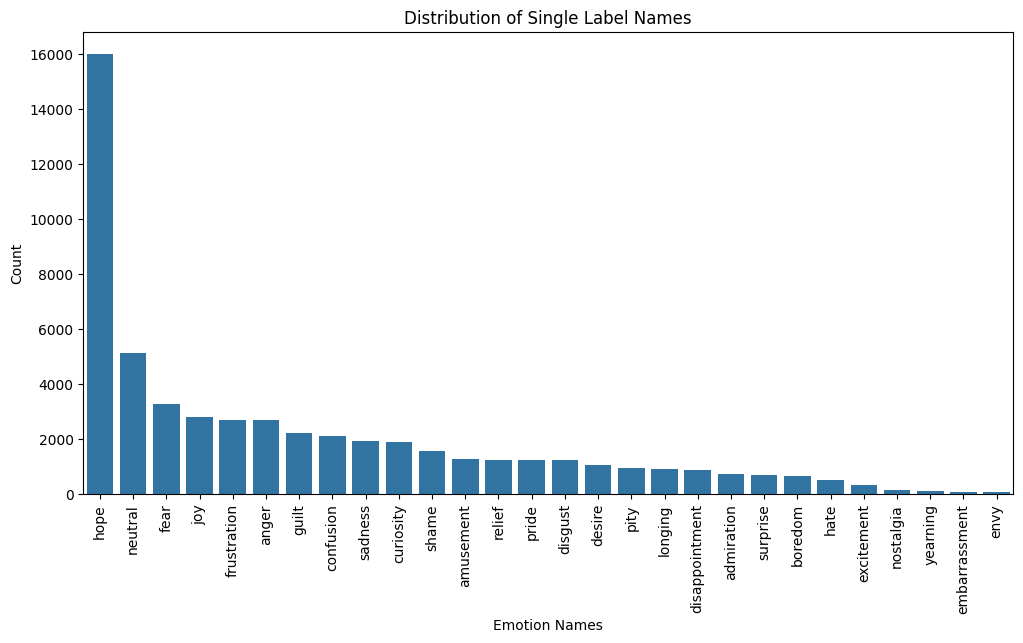

In [27]:
# Display the updated DataFrame with the new emotion name column
print(df_combined[['Single_Label', 'Single_Label_Name']].head())

# Check the distribution of the new emotion names
emotion_name_counts = df_combined['Single_Label_Name'].value_counts()
print("Emotion Name Distribution:\n", emotion_name_counts)

# Plot the distribution of emotion names
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_name_counts.index, y=emotion_name_counts.values)
plt.title("Distribution of Single Label Names")
plt.xlabel("Emotion Names")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [28]:
df_combined.head()

,TEXT,LABEL,Num_Labels,Single_Label,Single_Label_Name
0,My favourite food is anything I didn't have to...,[27],1,27,hope
1,"Now if he does off himself, everyone will thin...",[27],1,27,hope
2,WHY THE FUCK IS BAYLESS ISOING,[2],1,2,sadness
3,To make her feel threatened,[14],1,14,boredom
4,Dirty Southern Wankers,[3],1,3,anger


# Step 12: Map the Emotion ( Single_Label_Name) Column into their correspondent emotion from ISEAR Dataset

1. Define a mapping dictionary to specify how to group the emotions.

2. Create a function to replace the values based on this mapping.

3. Apply this function to create a new column with the mapped emotions.

4. Check the unique values in both the original and the new mapped column.

Unique values in Single_Label_Name:
 ['hope' 'sadness' 'boredom' 'anger' 'pity' 'frustration' 'surprise'
 'neutral' 'shame' 'joy' 'disgust' 'excitement' 'embarrassment' 'relief'
 'desire' 'guilt' 'confusion' 'pride' 'fear' 'disappointment' 'amusement'
 'hate' 'curiosity' 'longing' 'admiration' 'yearning' 'envy' 'nostalgia']

Unique values in Emotion:
 ['joy' 'sadness' 'boredom' 'anger' 'surprise' 'neutral' 'shame' 'disgust'
 'guilt' 'confusion' 'fear']

Emotion Distribution:
 EMOTION
joy          26569
anger         5923
neutral       5122
sadness       4872
fear          3269
guilt         2210
confusion     2117
shame         1624
disgust       1218
surprise       681
boredom        658
Name: count, dtype: int64


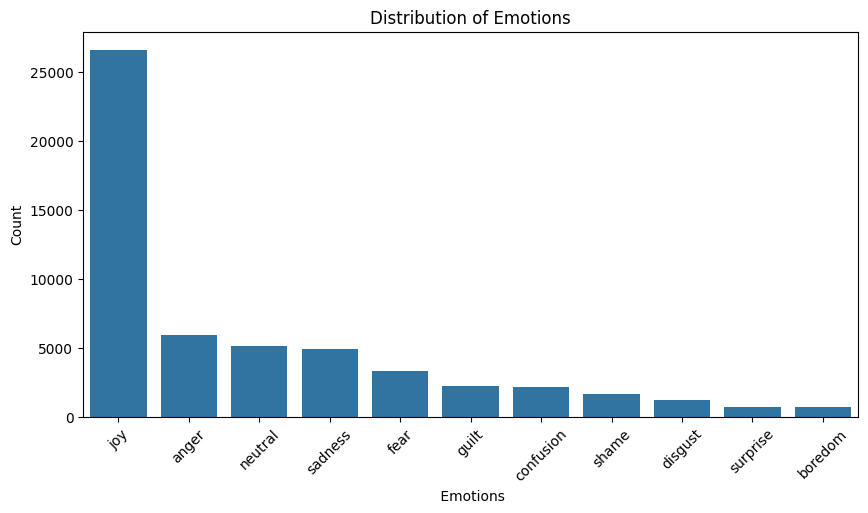

In [29]:
# Step 1: Define the updated mapping dictionary
emotion_mapping = {
    "joy": "joy",
    "amusement": "joy",
    "admiration": "joy",
    "excitement": "joy",
    "relief": "joy",
    "curiosity": "joy",
    "pride": "joy",
    "hope": "joy",
    "desire": "joy",
    "sadness": "sadness",
    "disappointment": "sadness",
    "nostalgia": "sadness",
    "longing": "sadness",
    "yearning": "sadness",
    "pity": "sadness",
    "anger": "anger",
    "frustration": "anger",
    "envy": "anger",
    "hate": "anger",
    "fear": "fear",
    "disgust": "disgust",
    "shame": "shame",
    "embarrassment": "shame",
    "guilt": "guilt",
    "neutral": "neutral",
    "surprise": "surprise",
    "confusion": "confusion",
    "boredom": "boredom"
}

# Step 2: Function to map emotions
def map_to_broad_emotion(emotion):
    return emotion_mapping.get(emotion, emotion)  # Default to the original if not in mapping

# Step 3: Apply the function to create a new column for mapped emotions
df_combined['EMOTION'] = df_combined['Single_Label_Name'].apply(map_to_broad_emotion)

# Step 4: Check unique values in both columns
unique_original = df_combined['Single_Label_Name'].unique()
unique_mapped = df_combined['EMOTION'].unique()

print("Unique values in Single_Label_Name:\n", unique_original)
print("\nUnique values in Emotion:\n", unique_mapped)

# Check the distribution of the broad emotions
broad_emotion_counts = df_combined['EMOTION'].value_counts()
print("\nEmotion Distribution:\n", broad_emotion_counts)

# Plot the distribution of broad emotions
plt.figure(figsize=(10, 5))
sns.barplot(x=broad_emotion_counts.index, y=broad_emotion_counts.values)
plt.title("Distribution of Emotions")
plt.xlabel(" Emotions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [30]:
df_combined.head(10)

,TEXT,LABEL,Num_Labels,Single_Label,Single_Label_Name,EMOTION
0,My favourite food is anything I didn't have to...,[27],1,27,hope,joy
1,"Now if he does off himself, everyone will thin...",[27],1,27,hope,joy
2,WHY THE FUCK IS BAYLESS ISOING,[2],1,2,sadness,sadness
3,To make her feel threatened,[14],1,14,boredom,boredom
4,Dirty Southern Wankers,[3],1,3,anger,anger
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],1,26,pity,sadness
6,Yes I heard abt the f bombs! That has to be wh...,[15],1,15,frustration,anger
7,We need more boards and to create a bit more s...,"[8, 20]",2,8,surprise,surprise
8,Damn youtube and outrage drama is super lucrat...,[0],1,0,neutral,neutral
9,It might be linked to the trust factor of your...,[27],1,27,hope,joy


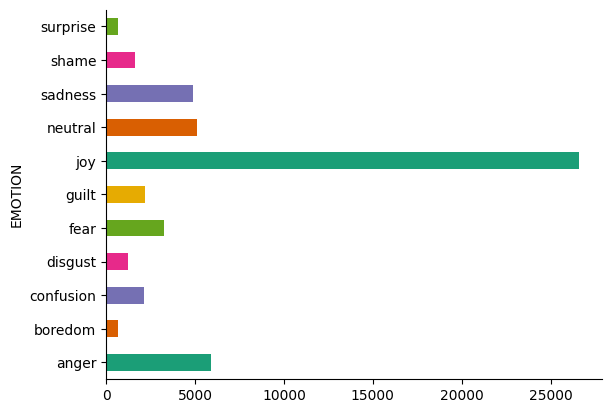

In [31]:
# Broad_Emotion
df_combined.groupby('EMOTION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Step 13: Clean the text

In [32]:
# Text Preprocessing
def preprocess_text(data, text_column, new_column='cleaned_text'):
    # Copy original text to a new column if specified
    data[new_column] = data[text_column].copy()

    # Convert uppercase letters to lowercase
    data[new_column] = data[new_column].apply(lambda a: " ".join(a.lower() for a in a.split()))

    # Remove special characters (you may want to adjust this to avoid removing valid characters)
    data[new_column] = data[new_column].apply(lambda a: " ".join(a.replace('[^\w\s]', '') for a in a.split()))

    # Remove stop words but keep 'in' and 'on'
    stop = set(stopwords.words('english'))
    stop.difference_update(['in', 'on'])  # Remove 'in' and 'on' from stopwords
    data[new_column] = data[new_column].apply(lambda a: " ".join(word for word in a.split() if word not in stop))

    # Stemming
    st = PorterStemmer()
    data[new_column] = data[new_column].apply(lambda a: " ".join(st.stem(word) for word in a.split()))

    return data

# Apply the preprocessing function to the combined DataFrame
df_combined = preprocess_text(df_combined, 'TEXT')

In [33]:
df_combined.head(5)

,TEXT,LABEL,Num_Labels,Single_Label,Single_Label_Name,EMOTION,cleaned_text
0,My favourite food is anything I didn't have to...,[27],1,27,hope,joy,favourit food anyth cook myself.
1,"Now if he does off himself, everyone will thin...",[27],1,27,hope,joy,"himself, everyon think he laugh screw peopl in..."
2,WHY THE FUCK IS BAYLESS ISOING,[2],1,2,sadness,sadness,fuck bayless iso
3,To make her feel threatened,[14],1,14,boredom,boredom,make feel threaten
4,Dirty Southern Wankers,[3],1,3,anger,anger,dirti southern wanker


In [34]:
# Save the processed DataFrame to a new CSV file
df_combined.to_csv('Go_Emotions_11_Emotions_Cleaned.csv', index=False)

In [35]:
from google.colab import files
files.download('Go_Emotions_11_Emotions_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>